<a href="https://colab.research.google.com/drive/1tElT3FhddabqCyJKFH27rhnyXJTqrzke?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [5]:
all_data.shape

(10000, 55)

In [6]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
clf = LogisticRegression()
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

C:\Users\iamda\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.6075

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
clf = LogisticRegression(solver='saga')

# init GridSearchCV with parameters
param_grid = {
    'C': np.arange(1, 5),
    'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

search.fit(feature_matrix, labels)

print(search.best_params_)

{'C': 1, 'penalty': 'l2'}


C:\Users\iamda\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.6418

# Homework

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


Train the `KNeighborsClassifier` on the dataset.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

accuracy_score(test_labels, y_pred)

0.7365

Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [20]:

params = {
    'n_neighbors': np.arange(1, 11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance'],
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(feature_matrix, labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Let's output the best parameters

In [22]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [24]:
optimal_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

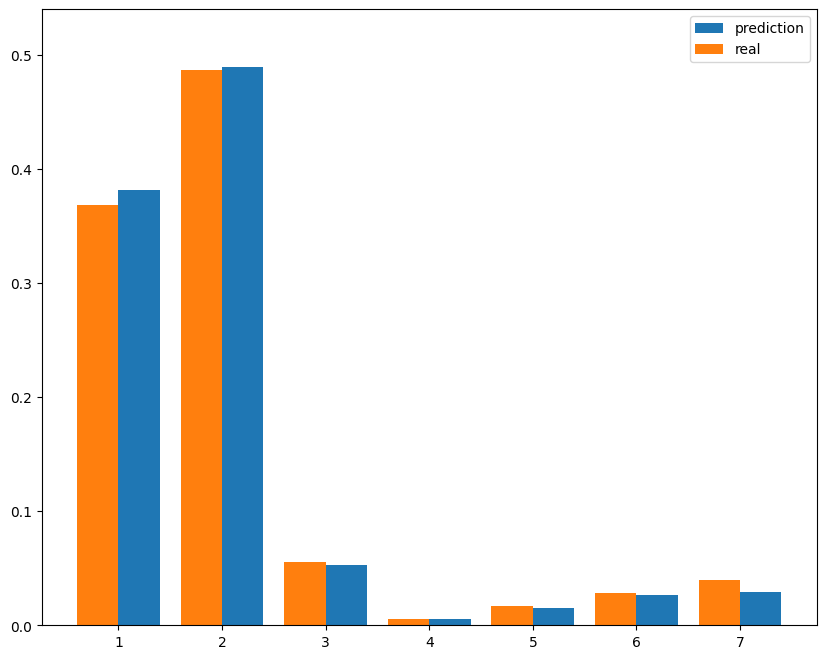

In [28]:
from matplotlib import pyplot as plt
unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

In [30]:
accuracy_score(labels, clf_grid.best_estimator_.predict(feature_matrix))

1.0

Числа уверенно сообщают нам, о том что модель "ближайших соседей" лучше логистической регрессии. Это потому что k-NN учитывает локальную структуру данных, тогда как логистическая регрессия строит глобальную линейную границу.

Плюсы и минусы метода k ближайших соседей  
Плюсы:  
✅ Простота реализации.  
✅ Нет этапа обучения (ленивое обучение).  
✅ Хорошо работает на данных с явными локальными закономерностями.  
✅ Автоматическая адаптация к многоклассовому случаю (без явного переобучения, как в OvR/OvO).  
  
Минусы:  
❌ Чувствителен к размерности данных (нужна предварительная обработка, например, PCA).  
❌ Требует хранения всех данных (большие затраты памяти).  
❌ Чувствителен к масштабированию признаков (нужна нормализация).  
❌ Медленный на предсказании (особенно на больших выборках).  
❌ Неочевидный выбор k для несбалансированных классов.

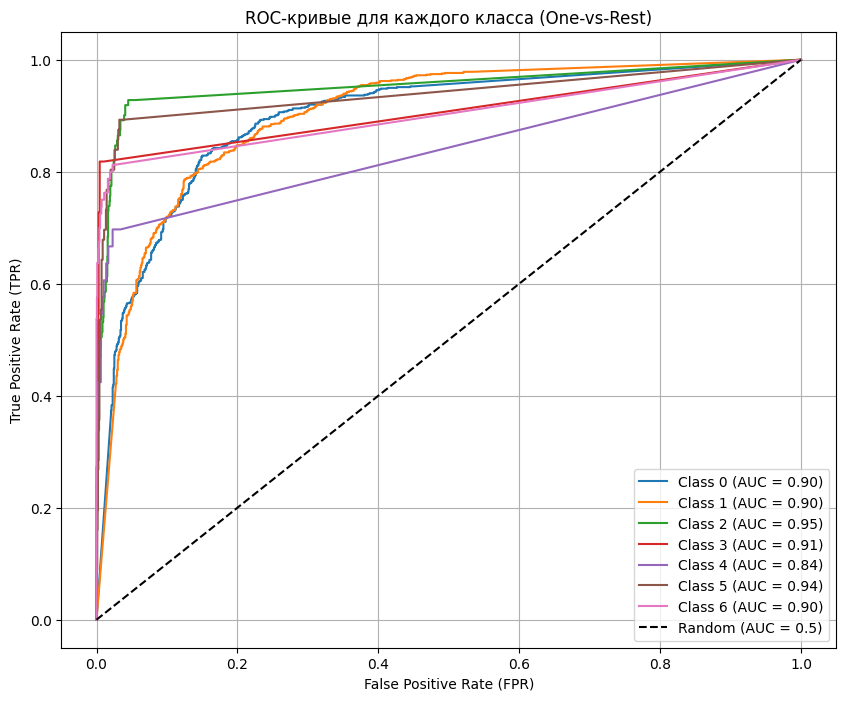

Micro-average AUC-ROC: 0.956


In [32]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Бинаризация меток для OvR
labels_test_bin = label_binarize(test_labels, classes=np.unique(labels))
n_classes = labels_test_bin.shape[1]

# Построение ROC-кривой для каждого класса (OvR)
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(labels_test_bin[:, i], pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривые для каждого класса (One-vs-Rest)')
plt.legend()
plt.grid()
plt.show()

# Микро-усредненный AUC-ROC (объединяет все классы)
fpr_micro, tpr_micro, _ = roc_curve(labels_test_bin.ravel(), pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
print(f"Micro-average AUC-ROC: {roc_auc_micro:.3f}")